Followed steps described at https://realpython.com/generative-adversarial-networks/

In [16]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

torch.manual_seed(111)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

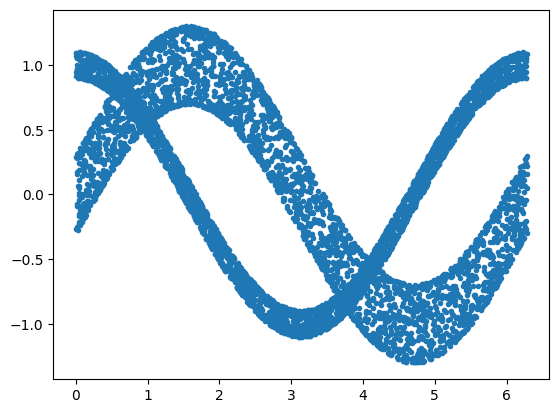

In [94]:
train_data_length = 1024*6

train_data = torch.zeros((train_data_length, 2))

# train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)

# train_data[:, 1] = torch.sin(train_data[:, 0])

train_data[:train_data_length//2, 0] = 2 * math.pi * torch.rand(train_data_length//2)

train_data[train_data_length//2:, 0] = 2 * math.pi * torch.rand(train_data_length//2)

train_data[:train_data_length//2, 1] = torch.sin(train_data[:train_data_length//2, 0]) + 0.3 * torch.cos(train_data[train_data_length//2:, 0])

train_data[train_data_length//2:, 1] = torch.cos(train_data[train_data_length//2:, 0]) + 0.1 * torch.sin(train_data[:train_data_length//2, 0])



train_labels = torch.zeros(train_data_length)

train_set = [

    (train_data[i], train_labels[i]) for i in range(train_data_length)

]
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [95]:
def plot_samples(generated_samples):
    plt.figure()
    plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")
    plt.show()
    plt.close()

In [96]:
class Discriminator(nn.Module):

    def __init__(self):

        super().__init__()

        self.model = nn.Sequential(

            nn.Linear(2, 256),

            nn.ReLU(),

            nn.Dropout(0.3),

            nn.Linear(256, 128),

            nn.ReLU(),

            nn.Dropout(0.3),

            nn.Linear(128, 64),

            nn.ReLU(),

            nn.Dropout(0.3),

            nn.Linear(64, 1),

            nn.Sigmoid(),

        )


    def forward(self, x):

        output = self.model(x)

        return output
    
class Generator(nn.Module):

    def __init__(self):

        super().__init__()

        self.model = nn.Sequential(

            nn.Linear(2, 16),

            nn.ReLU(),

            nn.Linear(16, 32),

            nn.ReLU(),

            nn.Linear(32, 2),

        )


    def forward(self, x):

        output = self.model(x)

        return output

In [97]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

lr = 0.001

num_epochs = 1500

loss_function = nn.BCELoss()

discriminator = Discriminator()
generator = Generator()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

Epoch: 0 Loss D.: 0.6661589741706848
Epoch: 0 Loss G.: 0.6606308817863464


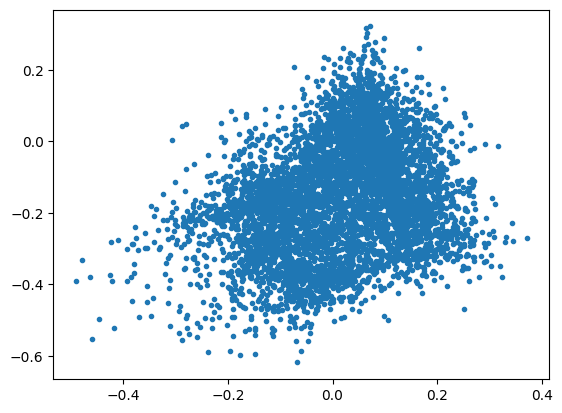

Epoch: 250 Loss D.: 0.6946391463279724
Epoch: 250 Loss G.: 0.6899428963661194


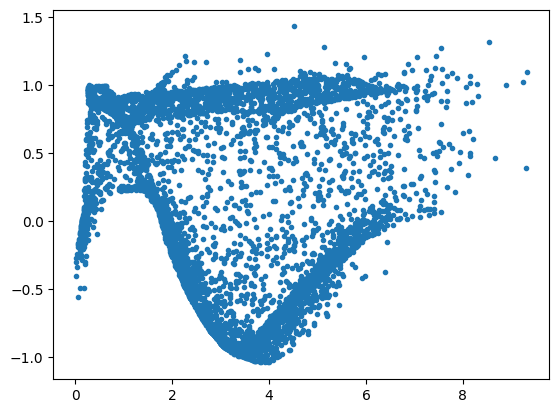

Epoch: 500 Loss D.: 0.6930556297302246
Epoch: 500 Loss G.: 0.693190336227417


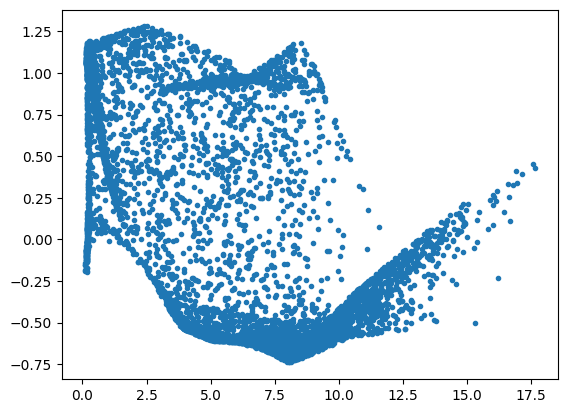

Epoch: 750 Loss D.: 0.6884353756904602
Epoch: 750 Loss G.: 0.6958964467048645


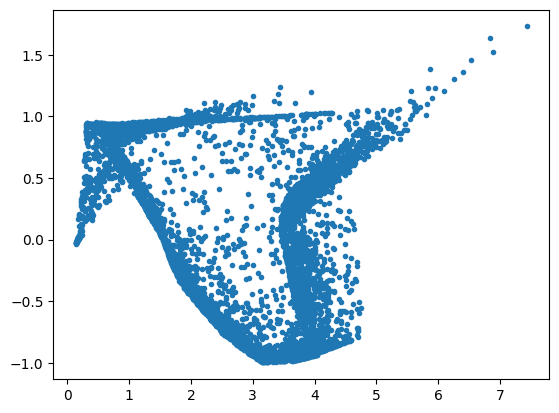

Epoch: 1000 Loss D.: 0.6928512454032898
Epoch: 1000 Loss G.: 0.6962409615516663


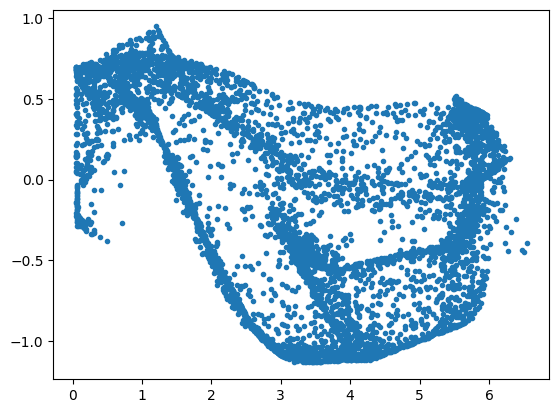

Epoch: 1250 Loss D.: 0.6915559768676758
Epoch: 1250 Loss G.: 0.6911268830299377


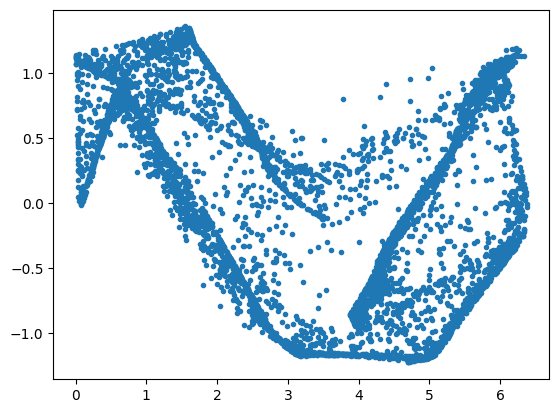

In [98]:
for epoch in range(num_epochs):

    for n, (real_samples, _) in enumerate(train_loader):

        # Data for training the discriminator

        real_samples_labels = torch.ones((batch_size, 1))

        latent_space_samples = torch.randn((batch_size, 2))

        generated_samples = generator(latent_space_samples)

        generated_samples_labels = torch.zeros((batch_size, 1))

        all_samples = torch.cat((real_samples, generated_samples))

        all_samples_labels = torch.cat(

            (real_samples_labels, generated_samples_labels)

        )


        # Training the discriminator

        discriminator.zero_grad()

        output_discriminator = discriminator(all_samples)

        loss_discriminator = loss_function(

            output_discriminator, all_samples_labels)

        loss_discriminator.backward()

        optimizer_discriminator.step()


        # Data for training the generator

        latent_space_samples = torch.randn((batch_size, 2))


        # Training the generator

        generator.zero_grad()

        generated_samples = generator(latent_space_samples)

        output_discriminator_generated = discriminator(generated_samples)

        loss_generator = loss_function(

            output_discriminator_generated, real_samples_labels

        )

        loss_generator.backward()

        optimizer_generator.step()


        # Show loss

        if epoch % 250 == 0 and n == 0:

            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")

            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            
            latent_space_samples = torch.randn(train_data_length, 2)
            generated_samples = generator(latent_space_samples)
            generated_samples = generated_samples.detach()
            plot_samples(generated_samples)

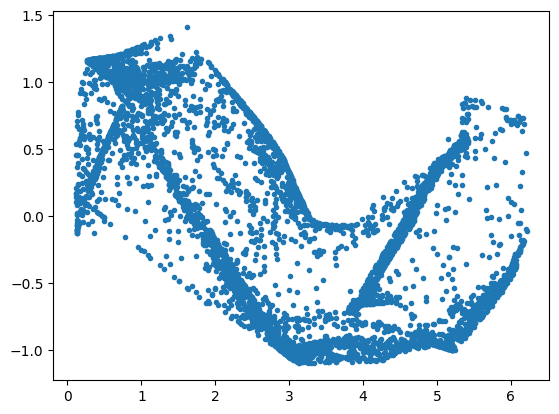

In [99]:
latent_space_samples = torch.randn(train_data_length, 2)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
plot_samples(generated_samples)